<img title="GitHub Octocat" src='../images/Octocat.jpg?raw=true' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/SFI-Grants-and-Awards 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">SFI - Awards Distribution Analysis</p>

# An overview of science funding distribution in Ireland

<img src='../images/research-grant-approved.jpeg' style='height:400px'/>

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">Contents:</p>

* [1. Introduction](#1)
    * [1.1 Audience](#1.1)
    * [1.2 Dataset](#1.2)
    * [1.3 Libraries](#1.3)
* [2. Data Cleaning & Wrangling](#2)
* [3. Exploratory Data Analysis](#3)
    * [3.1 Most awarded Institutes by amount €](#3.1)
    * [3.2 Most awarded Institutes by number of grants](#3.2)
    * [3.3 Grants distribution by Programmes](#3.3)
* [4. Dashboard](#4)

<a id="1"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">1- Introduction</p>

<img src='../images/sfi-logo.svg' style='height:100px; padding: 15px' align='right'/> This report will provide an overview of awards applied by [Science Foundation Ireland (SFI)](https://www.sfi.ie/) which is the national foundation for investment in scientific and engineering research. The data provided covers a period of time from 2000 to 2019.

The Agreed Programme for Government, published June 2002, provided for establishing SFI as a separate legal entity. In July 2003, SFI was established on a statutory basis under the Industrial Development (Science Foundation Ireland) Act, 2003.

SFI provides awards to support scientists and engineers working in the fields of science and engineering that underpin biotechnology, information and communications technology and sustainable energy and energy-efficient technologies.

The __focus__ of this report is on research funding and __geographical distribution of grant awardees__. 

<a id="1.1"></a>
## Audience

A core principle of data analysis is understanding your audience before designing your visualization. It is important to match your visualization to your viewer’s information needs.

To provide better context, this report will be based on a hypothetical presentation to [SFI Board Members](https://www.sfi.ie/about-us/about-sfi/organisation/board-members/). The Board has several responsibilities which include the revision of strategies of the Agency and major plans of action. One of their major functions is to establish the Agency's direction and how the resources are allocated.

<a id="1.2"></a>
## Dataset

The dataset used is [Science Foundation Ireland Grant Commitments](https://data.gov.ie/dataset/science-foundation-ireland-grant-commitments) and it details all STEM (science, technology, engineering and maths) research projects funded by Science Foundation Ireland (SFI) since its foundation in 2000. For more information, check out the [Data Dictionary](https://www.sfi.ie/about-us/governance/open-data/Science-Foundation-Ireland-Grant-Commitments-Metadata.pdf) available.

Dataset provided by [Ireland's Open Data Portal](https://data.gov.ie/) which helds public data from Irish Public Sectors such as Agriculture, Economy, Housing, Transportation etc.

<a id="1.3"></a>
## Libraries

In [2]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)
options(warn=-1)
# Suppress summarise info
options(dplyr.summarise.inform = FALSE)
options(dplyr = FALSE)

In [20]:
# Check if the packages that we need are installed
want = c("dplyr", "ggplot2", "ggthemes", "gghighlight", 
         "grid", "foreign", "scales", "ggpubr", "forcats", 
         "stringr", "lubridate")
have = want %in% rownames(installed.packages())
# Install the packages that we miss
if ( any(!have) ) { install.packages( want[!have] ) }
# Load the packages
junk <- lapply(want, library, character.only = T)
# Remove the objects we created
rm(have, want, junk)

In [4]:
# Importing dataset
sfi.grants <- read.csv('../data/Open-Data-Final.csv')

# Checking dataset's structure
head(sfi.grants)

,Proposal.ID,Programme.Name,Sub.programme.Name,Supplement,Lead.Applicant,ORCID,Research.Body,Funder.Name,Crossref.Funder.Registry.ID,Proposal.Title,Start.Date,End.Date,Revised.Total.Commitment
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,00/PI.1/B038,SFI Principal Investigator Programme,,,Seamus Martin,https://orcid.org/0000-0002-8539-3143,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Establishing functional proteomic maps of proteins involved in apoptosis,01/10/2001,04/03/2007,5471668
2,00/PI.1/B045,SFI Principal Investigator Programme,,,Kingston Mills,https://orcid.org/0000-0003-3646-8222,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Pathogen-derived immunomodulatory molecules: future immunotherapeutics and vaccines,01/10/2001,04/12/2006,8069352
3,00/PI.1/B052,SFI Principal Investigator Programme,,,Kenneth Wolfe,https://orcid.org/0000-0003-4992-4979,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Functional Organisation of Eukaryotic Genomes,01/10/2001,04/12/2006,5632098
4,00/PI.1/C017,SFI Principal Investigator Programme,,,John Lewis,,Technological University Dublin (TU Dublin),Science Foundation Ireland,10.13039/501100001602,Measurement-Based Resource Management in Communication Networks.,01/12/2001,05/11/2006,2993355
5,00/PI.1/C028,SFI Principal Investigator Programme,,,John Pethica,,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Nanostructures and Molecule Mechanics.,01/12/2001,04/05/2007,7567189
6,00/PI.1/C042,SFI Principal Investigator Programme,,,Igor Shvets,https://orcid.org/0000-0001-7451-5435,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Studies of Surfaces and Interfaces of Magnetic Spinel Oxides.,01/12/2001,05/11/2006,7785757


<a id="2"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">2- Data Cleaning & Wrangling</p>

In [5]:
# Cleaning data
sfi.new.grants <- sfi.grants

# Because we are going to analyze new grants from the SFI...
# There are a few grants from funding partners and a few splitting of awards where an award
# was transferred from one institution to another.
# Removing those
sfi.new.grants <- sfi.new.grants[-grep("(N)", sfi.grants$Proposal.ID, fixed = T),]
sfi.new.grants <- sfi.new.grants[-grep("(X)", sfi.grants$Proposal.ID, fixed = T),]
sfi.new.grants <- sfi.new.grants[-grep("(T)", sfi.grants$Proposal.ID, fixed = T),]

In [6]:
# Total of rows from Partners Funds and Splittings - 68
nrow(sfi.grants) - nrow(sfi.new.grants)

[1] 68

In [7]:
# There are 11 "negatives" or 0 grants which will interfere in the analysis
# Decided to remove those (only one will be transform to absolute value)
negatives <- sfi.new.grants %>% filter(Revised.Total.Commitment < 10)

In [8]:
# Remove all negative grants
sfi.new.grants$Revised.Total.Commitment <- abs(sfi.new.grants$Revised.Total.Commitment)
sfi.new.grants <- sfi.new.grants[sfi.new.grants$Revised.Total.Commitment > 10,]

In [9]:
sfi.new.grants <- sfi.new.grants %>% mutate(Programme.Name.Clean = str_replace(Programme.Name, "SFI ", ""),
                                           Programme.Name.Clean = str_replace(Programme.Name.Clean, " Programme", ""))

In [10]:
sfi.new.grants$Date <- as.Date(sfi.new.grants$Start.Date, format = "%d/%m/%Y")
sfi.new.grants$Date <- format(sfi.new.grants$Date, "%Y-%m-%d")

In [11]:
allMissing <- is.na(sfi.new.grants)
#get a count for each column
counts <- colSums(allMissing)
counts

Proposal.ID              Programme.Name 
                          0                           0 
         Sub.programme.Name                  Supplement 
                          0                           0 
             Lead.Applicant                       ORCID 
                          0                           0 
              Research.Body                 Funder.Name 
                          0                           0 
Crossref.Funder.Registry.ID              Proposal.Title 
                          0                           0 
                 Start.Date                    End.Date 
                          0                           0 
   Revised.Total.Commitment        Programme.Name.Clean 
                          0                           0 
                       Date 
                          0

In [12]:
paste0("Number of rows in the dataset: ", nrow(sfi.new.grants))

[1] "Number of rows in the dataset: 5317"

<a id="3"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">3- Exploratory Data Analysis</p>

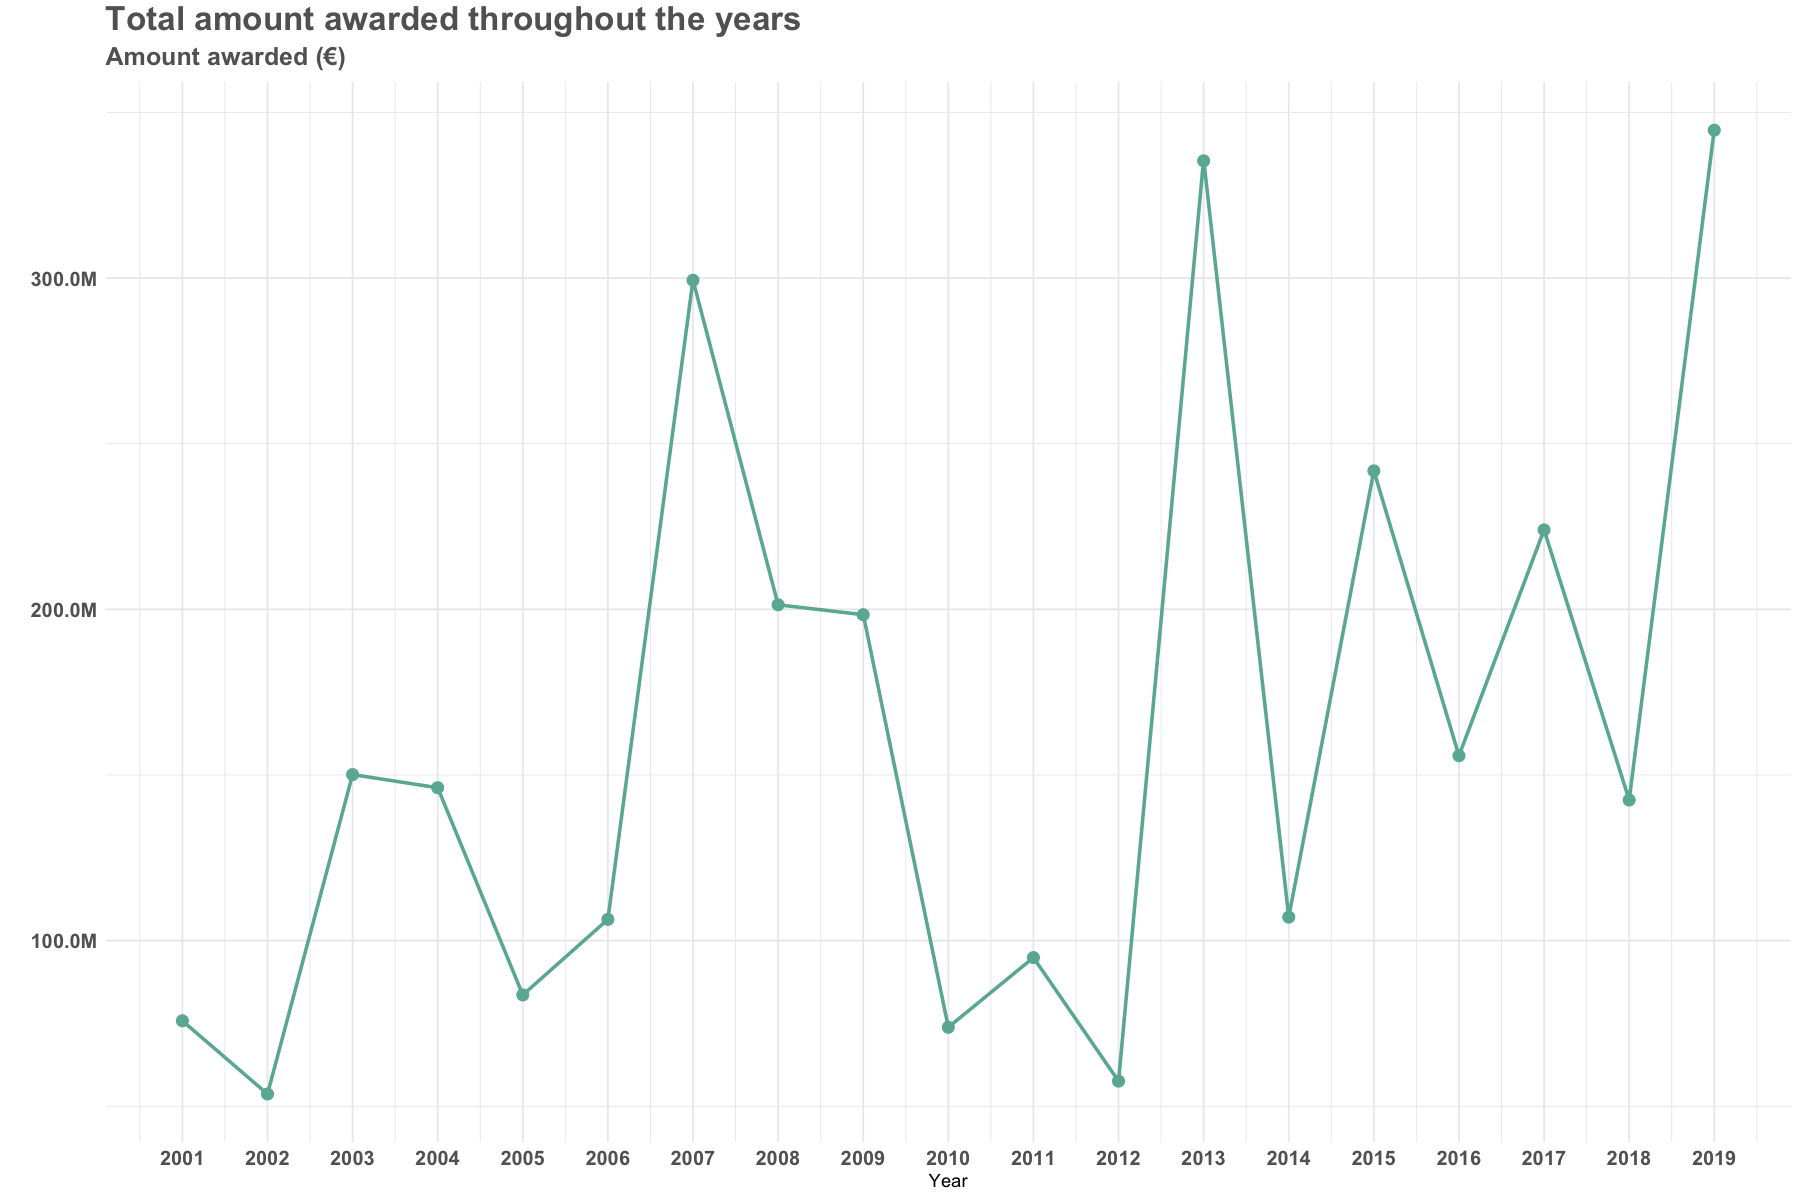

In [13]:
sfi.new.grants %>% mutate(year = year(Date)) %>%
    group_by(year) %>% 
    summarise(total = sum(Revised.Total.Commitment),
        n= n(), average = sum(total)/sum(n)) %>%
    ggplot( aes(x = year, y= total) ) + 
        geom_line( color="#69b3a2", size = 1) +
        geom_point( color="#69b3a2",size=3) +
        labs(x = "Year", y = "",
             title = "Total amount awarded throughout the years",
            subtitle = "Amount awarded (€)") +
        scale_y_continuous(labels = scales::label_number_si(accuracy=0.1)) +
        scale_x_continuous(breaks = seq(from = 2000, to = 2019, by = 1)) +
        scale_fill_brewer(palette='Dark2') +
        theme_minimal() +
        theme(axis.text.x = element_text(face="bold", color="#636363", size=12),
              axis.text.y = element_text(face="bold", color="#636363", size=12),
              plot.title=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=20),
              plot.subtitle=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=15))

<a id="3.1"></a>
## Most awarded Institutes by amount €

In [14]:
# Grouping by Institutes and creating the sum, mean and total number of grants
by_institute <- sfi.new.grants %>% 
  group_by(Research.Body) %>% 
  summarise(total = sum(Revised.Total.Commitment),
            mean = mean(Revised.Total.Commitment),
            n= n()) %>% ungroup()

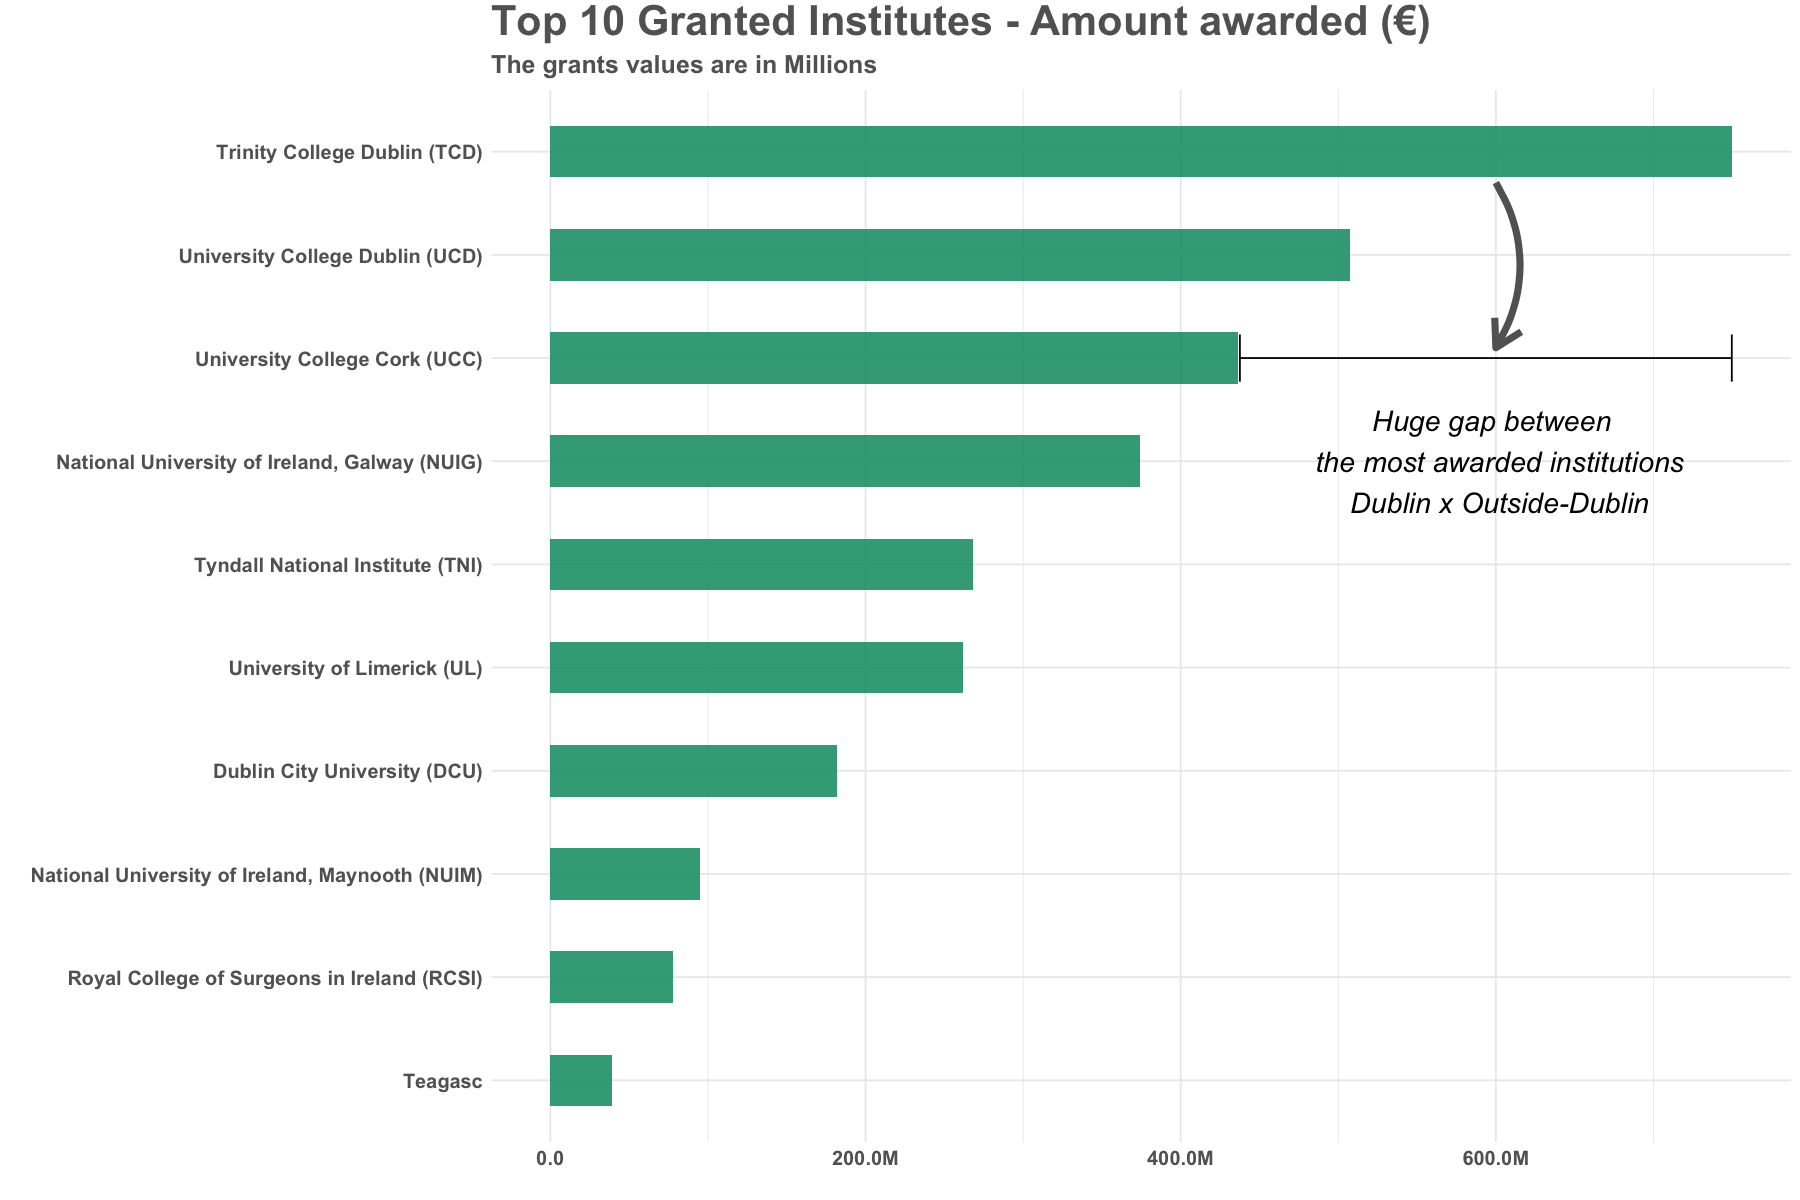

In [15]:
# Plot the Top 10 Institutes which received the highest grants amount
top10.institutes.value <- by_institute %>% arrange(desc(total)) %>% head(10)

top10.institutes.value %>% 
ggplot( aes(x =reorder(as.factor(Research.Body), total), 
              y= total, fill="") ) + 
    geom_bar(inherit.aes = TRUE, lineend = 'round',
             stat = "identity", width = .5, alpha=.9) +
    scale_y_continuous(labels = scales::label_number_si(accuracy=0.1)) +
    annotate("segment", x = 8, xend = 8, y = 437562222, yend = 749722478,
               arrow = arrow(ends = "both", angle = 90, length = unit(.5,"cm"))) +
    annotate("curve", curvature = -.3, x = 9.7, xend = 8.1, y = 6e+08, yend = 6e+08,
               colour = "#636363", size = 2, arrow = arrow()) +
    annotate("text", x = 7, y = 6e+08, family = "", fontface = 3, size=6,
               label = "Huge gap between \n the most awarded institutions\n Dublin x Outside-Dublin") +
    scale_fill_brewer(palette='Dark2') +
    labs(x = "", y = "",
         title = "Top 10 Granted Institutes - Amount awarded (€)",
        subtitle = "The grants values are in Millions") +
    theme_minimal() + coord_flip() +
    theme(legend.position = "none",
          axis.text.x = element_text(face="bold", color="#636363", size=12),
          axis.text.y = element_text(face="bold", color="#636363", size=12),
          plot.title=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=25),
          plot.subtitle=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=15))

From the chart we can see that __Trinity College__ Dublin was awarded almost the __double__ amount comparing to the first top College outside Dublin (University College Cork).

<a id="3.2"></a>
## Most awarded Institutes by number of grants

Selecting by n



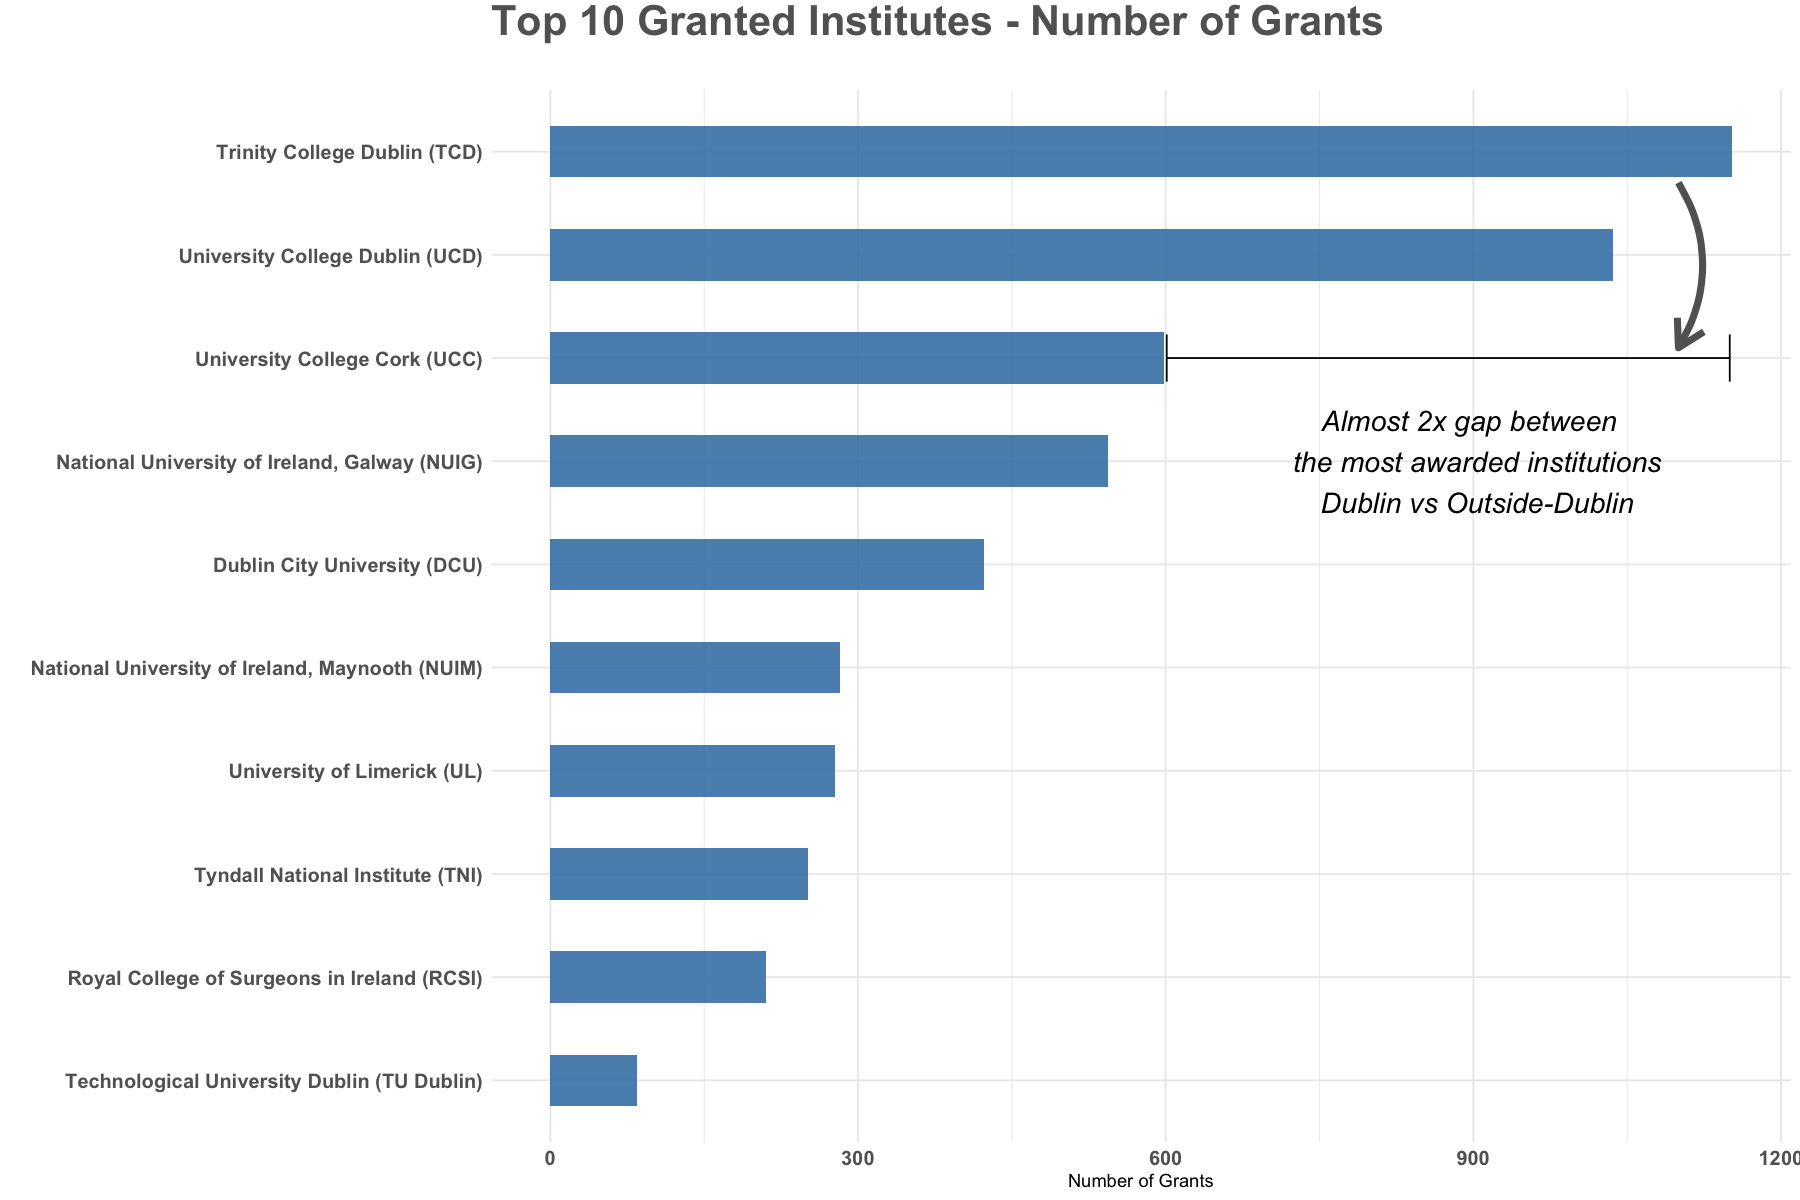

In [16]:
top10.institutes.total <- by_institute %>% arrange(desc(total)) %>% top_n(10)

top10.institutes.total %>% 
ggplot( aes(x =reorder(as.factor(Research.Body), n), 
              y= n) ) + 
    geom_bar(lineend = 'round',
             stat = "identity", width = .5, alpha=.9, fill="steelblue") +
    annotate("segment", x = 8, xend = 8, y = 601, yend = 1150,
               arrow = arrow(ends = "both", angle = 90, length = unit(.5,"cm"))) +
    annotate("curve", curvature = -.3, x = 9.7, xend = 8.1, y = 1100, yend = 1100,
               colour = "#636363", size = 2, arrow = arrow()) +
    annotate("text", x = 7, y = 900, family = "", fontface = 3, size=6,
               label = "Almost 2x gap between \n the most awarded institutions\n Dublin vs Outside-Dublin") +
    scale_fill_brewer(palette='Set2') +
    scale_y_continuous(name="Number of Grants") +
    labs(x = "", y = "",
         title = "Top 10 Granted Institutes - Number of Grants",
        subtitle = "") +
    theme_minimal() + coord_flip() +
    theme(legend.position = "none",
          axis.text.x = element_text(face="bold", color="#636363", size=12),
          axis.text.y = element_text(face="bold", color="#636363", size=12),
          plot.title=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=25),
          plot.subtitle=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=15))

Comparing number of Grants awarded, __Trinity College__ is again the winner. Has received almost __double of grants__ in numbers comparing to University College Cork, which is the first top outside-Dublin institution.

<a id="3.3"></a>
## Grants distribution by Programmes

In [17]:
# Grouping by Programmes and creating the sum, mean and total number of grants

by_programme <- sfi.new.grants %>% 
  group_by(Programme.Name.Clean) %>% 
  summarise(total = sum(Revised.Total.Commitment),
            mean = mean(Revised.Total.Commitment),
            n= n()) %>% ungroup()

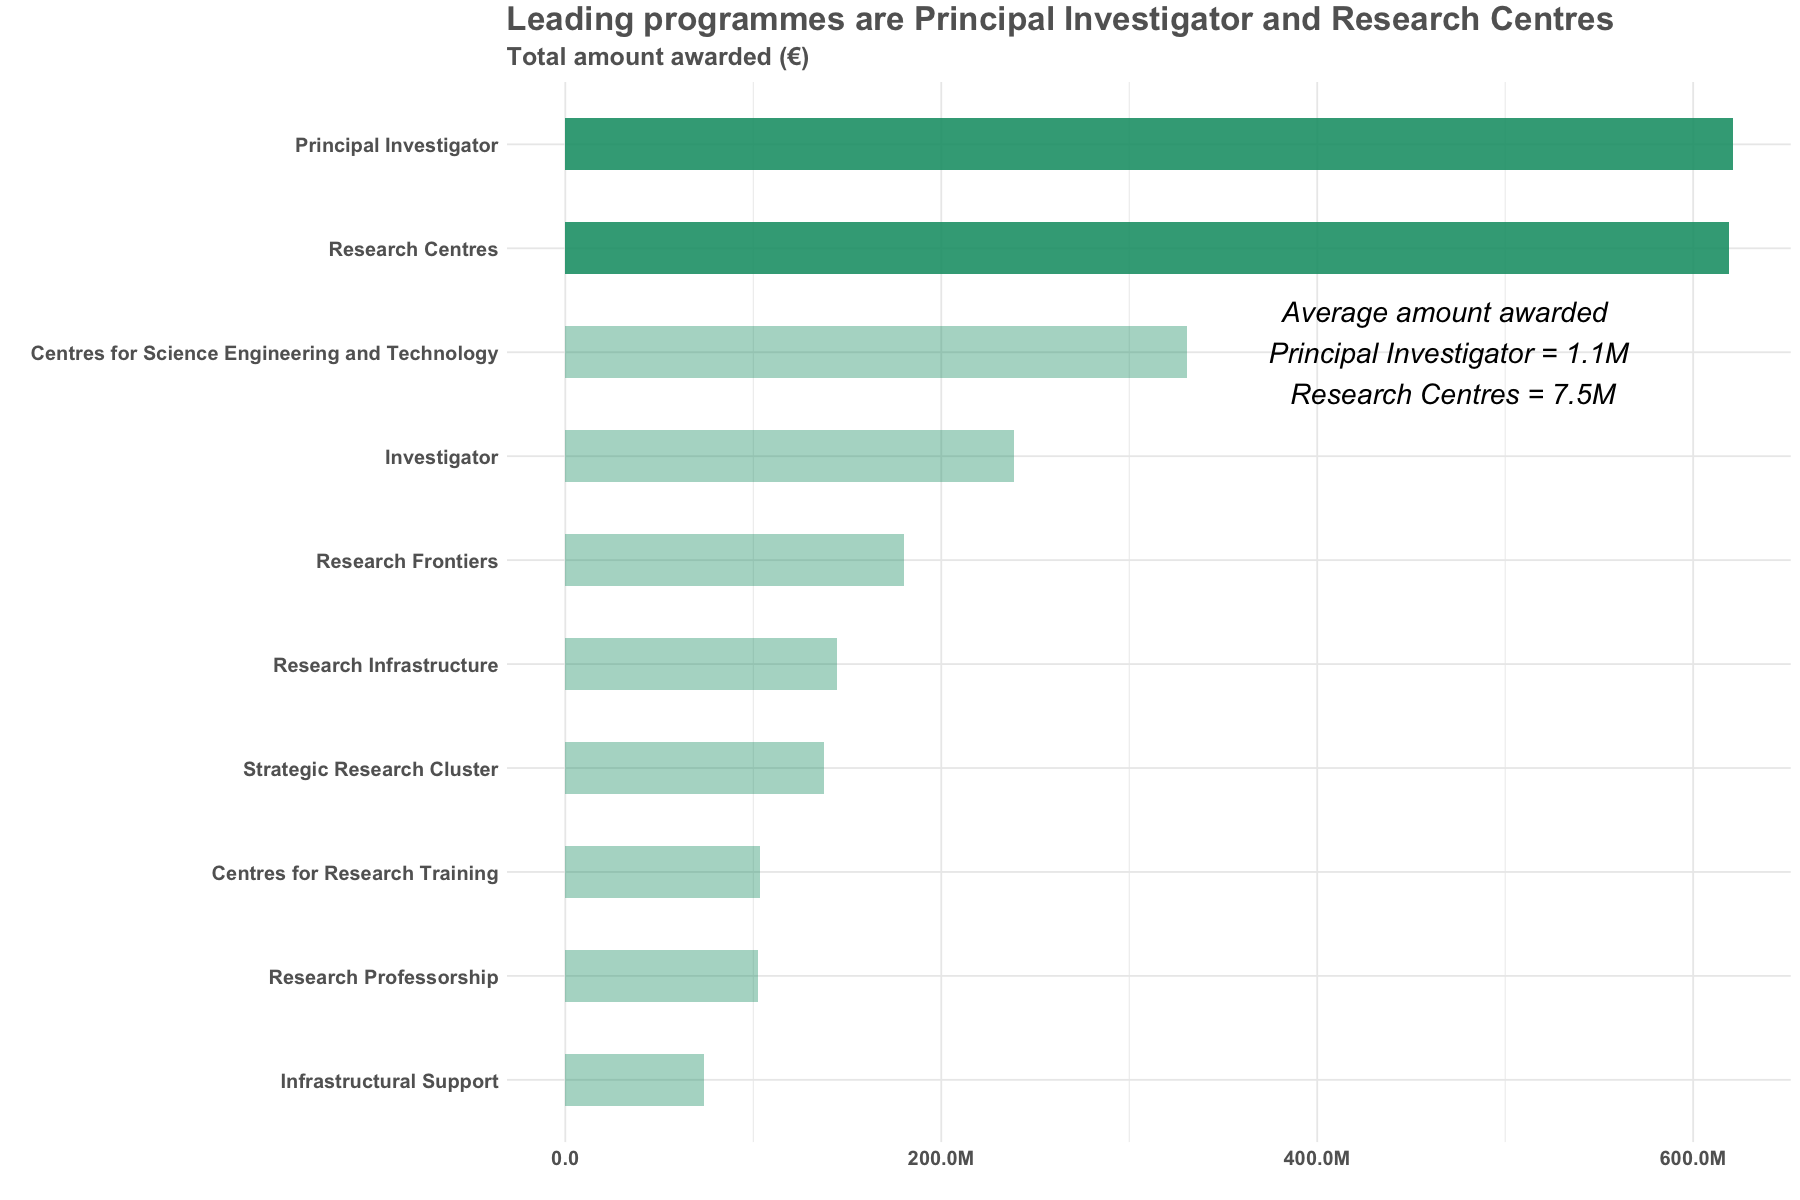

In [18]:
top10.programmes.value <- by_programme %>% arrange(desc(total)) %>% head(10)

top10.programmes.value %>% 
ggplot( aes(x =reorder(as.factor(Programme.Name.Clean), total), 
              y= total, fill="") ) + 
    geom_bar(lineend = 'round',
             stat = "identity", width = .5, 
             alpha= ifelse(top10.programmes.value$Programme.Name.Clean == "Principal Investigator" | top10.programmes.value$Programme.Name.Clean == "Research Centres", 
                           .9, .4)) +
    scale_fill_brewer(palette='Dark2') +
    scale_y_continuous(labels = scales::label_number_si(accuracy=0.1)) +
    annotate("text", x = 8, y = 4.7e+08, family = "", fontface = 3, size=6,
               label = "Average amount awarded \n Principal Investigator = 1.1M \n Research Centres = 7.5M") +
    labs(x = "", y = "",
         title = "Leading programmes are Principal Investigator and Research Centres",
        subtitle = "Total amount awarded (€)") +
    theme_minimal() + coord_flip() +
    theme(legend.position = "none",
          axis.text.x = element_text(face="bold", color="#636363", size=12),
          axis.text.y = element_text(face="bold", color="#636363", size=12),
          plot.title=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=20),
          plot.subtitle=element_text(vjust=1.5, family='', face='bold', colour='#636363', size=15))

The 2 most granted Programmes are: __SFI Principal Investigator Programme__ and __SFI Research Centres Programme__.

Although SFI Principal Investigator Programme has the highest total amount awarded, the __average__ amount awarded to SFI Research Centres Programme is __7x higher__ than the SFI Principal Investigator Programme.

<a id="4"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">4- Dashboard</p>

<img src='../images/tableau-logo.png' style='height:50px; padding-right:15px' align='left'/> 
<br>
This Dashboard was created using Tableau® software.
<br><br>

The __focus__ is to show the main insights found on this analysis. The Dashboard along with the Data Exploration can be found on [Tableau website](https://public.tableau.com/profile/leandro.pessini#!/vizhome/ScienceFoundationIrelandSFI-AwardsDistribution/AwardsDistributionDashboard).

![SFI - Gender Dashboard](../images/awards-dist-dashboard.png)

<img title="GitHub Mark" src="../images/GitHub-Mark-64px.png?raw=true" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/SFI-Grants-and-Awards) <br>Author: Leandro Pessini

In [19]:
R.version$version.string

[1] "R version 4.0.2 (2020-06-22)"